In [21]:
from sklearn import tree
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
import graphviz

In [2]:
boston = load_boston()
regressor = tree.DecisionTreeRegressor(random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10,scoring='neg_mean_squared_error')

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

In [17]:
regressor = regressor.fit(boston.data,boston.target)

In [16]:
feature_name = boston.feature_names

In [22]:
dot_data = tree.export_graphviz(regressor
                               ,out_file=None
                               ,feature_names=feature_name
                               #,class_names=['否','是']
                               ,filled=True
                               ,rounded=True)

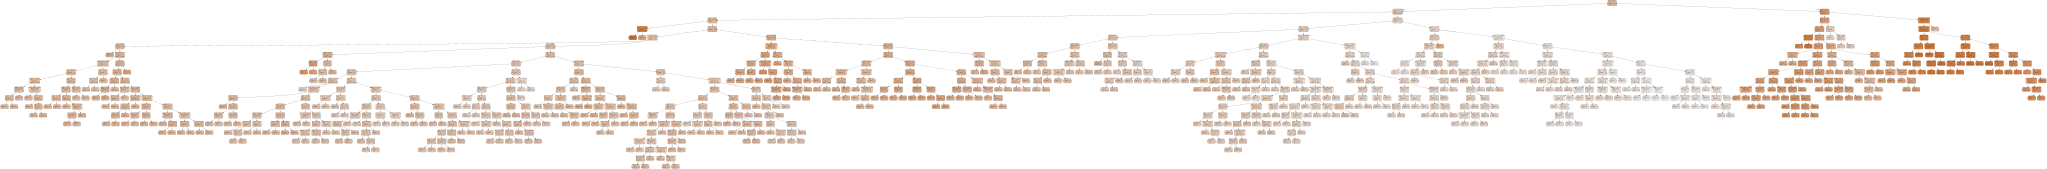

In [23]:
graph = graphviz.Source(dot_data)
graph

### 一维回归图像的绘制

#### 1.导入需要的库

In [3]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

#### 2.绘制一条含有噪声的正弦曲线

In [4]:
rng = np.random.RandomState(1)  # 随机数种子
X = np.sort(5*rng.rand(80,1),axis=0)  # 在0~5之间生成80个数字
y = np.sin(X).ravel()  # 将y变为一维数组
y[::5] += 3*(0.5-rng.rand(16))

#### 3.实例化&训练模型

In [5]:
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

#### 4.测试集导入模型，预测结果

In [6]:
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

#### 5.绘制图像

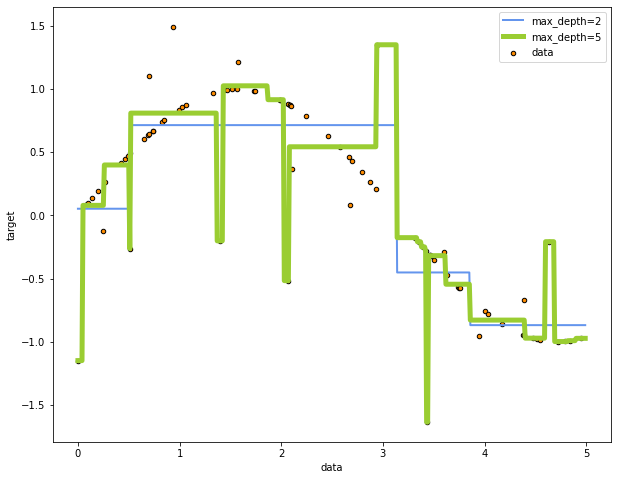

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(X,y,s=20,edgecolor='black',c='darkorange',label='data')
plt.plot(X_test,y_1,color='cornflowerblue',label='max_depth=2',linewidth=2)
plt.plot(X_test,y_2,color='yellowgreen',label='max_depth=5',linewidth=5)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()